In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
#Read the Airbnb Data
df = pd.read_excel('1730285881-Airbnb_Open_Data.xlsx')

In [ ]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [ ]:
df.duplicated().value_counts()

,count
False,102058
True,541


In [ ]:
#Neighbourhood group was 'brookln' instead of 'Brooklyn'
df[df['neighbourhood group']== 'brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,116.0,4.0,167.0,2019-06-24,1.34,4.0,3.0,47.0,NaN,NaN


In [ ]:
#Drop duplicate records
df.drop_duplicates(inplace=True)

#Drop all records with missing values
df.dropna(inplace=True)

#change all mismatched data types to the appropriate once.
df['price']= pd.to_numeric(df['price'], errors='coerce')
df['service fee']= pd.to_numeric(df['service fee'], errors='coerce')
df['id']= df['id'].astype('str')
df['host id']= df['host id'].astype('str')
df['last review']= pd.to_datetime(df['last review'])
df['Construction year']= df['Construction year'].astype('int')

#correct the spelling of 'brookln' to 'Brooklyn'
df.loc[df['neighbourhood group']== 'brookln','neighbourhood group']= 'Brooklyn'

#get rid of outliers in the availability 365 column data
df=df.drop(df[df['availability 365']>500].index)

In [ ]:
df.duplicated().value_counts()

,count
False,83389


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83389 entries, 0 to 102040
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83389 non-null  object        
 1   NAME                            83389 non-null  object        
 2   host id                         83389 non-null  object        
 3   host_identity_verified          83389 non-null  object        
 4   host name                       83389 non-null  object        
 5   neighbourhood group             83389 non-null  object        
 6   neighbourhood                   83389 non-null  object        
 7   lat                             83389 non-null  float64       
 8   long                            83389 non-null  float64       
 9   country                         83389 non-null  object        
 10  country code                    83389 non-null  object        
 11  instan

Summary Statistics

In [ ]:
df.describe()

,lat,long,instant_bookable,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389,83389.000000,83389.000000,83389.000000,83389.000000
mean,40.727349,-73.948502,0.497704,2012.487810,626.209668,125.243114,7.406109,32.261305,2019-06-08 21:32:53.396971008,1.377352,3.278694,7.032894,141.746369
min,40.504560,-74.249840,0.000000,2003.000000,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687640,-73.982110,0.000000,2007.000000,340.000000,68.000000,2.000000,3.000000,2018-10-25 00:00:00,0.220000,2.000000,1.000000,6.000000
50%,40.721320,-73.953710,0.000000,2012.000000,625.000000,125.000000,3.000000,11.000000,2019-06-13 00:00:00,0.740000,3.000000,1.000000,101.000000
75%,40.762600,-73.930800,1.000000,2017.000000,914.000000,183.000000,5.000000,38.000000,2019-07-05 00:00:00,2.010000,4.000000,2.000000,266.000000
max,40.916970,-73.705220,1.000000,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,426.000000
std,0.056326,0.050342,0.499998,5.760526,331.803443,66.364212,28.105563,51.954290,NaN,1.751091,1.283678,29.555458,133.377544


What are the different property types in the Dataset ?

In [ ]:
#What are the different property types in the Dataset?
property_types = df['room type'].value_counts().reset_index()
property_types.columns = ['room_type', 'count']
property_types

,room_type,count
0,Entire home/apt,44161
1,Private room,37474
2,Shared room,1646
3,Hotel room,108


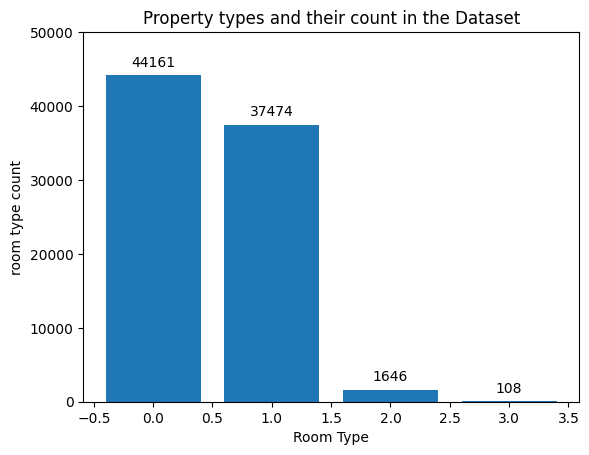

In [ ]:
#room type count plotted on a barchart
room_type_bar= plt.bar(property_types.index, property_types.loc[:,"count"]);
plt.bar_label(room_type_bar, labels= property_types.loc[:,"count"],padding=4);
plt.ylim([0,50000]);
plt.xlabel('Room Type');
plt.ylabel('room type count');
plt.title('Property types and their count in the Dataset');

The Airbnb open dataset reveals four distinct property or room types. These categories comprise:


*   Entire Home
*   Private Room
*   Shared Room
*   Hotel Room






Which neighborhood group has the highest number of listings?

In [ ]:
hood_group= df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Brooklyn,34622
Manhattan,34560
Queens,11124
Bronx,2267
Staten Island,816


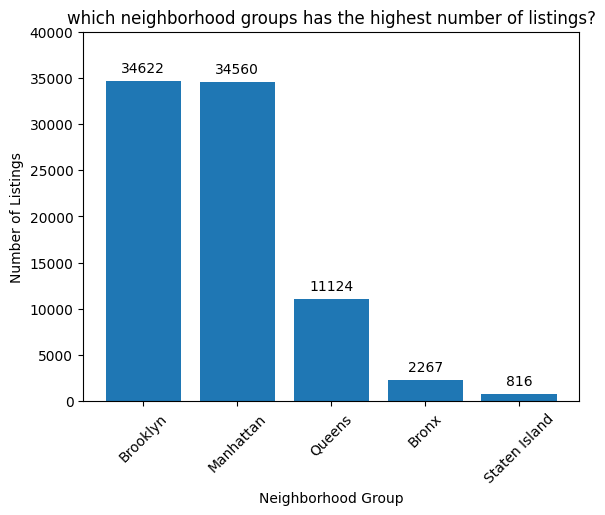

In [ ]:
#which neighborhood group has the highest number of listings?
hood_group_bar= plt.bar(hood_group.index, hood_group.loc[:,"count"]);
plt.bar_label(hood_group_bar, labels= hood_group.loc[:,"count"],padding=4);
plt.ylim([0,40000]);
plt.xlabel('Neighborhood Group');
plt.ylabel('Number of Listings');
plt.xticks(rotation=45);
plt.title('which neighborhood groups has the highest number of listings?');

The dataset contains five different neighborhood groups, namely Broolyn, Manhattan, Queens, Bronx and Staten Island. According to the barchart, Brooklyn has the highest number of listings with 34622, followed closely by Manhattan with 34560.

What neighborhoods group have the highest average prices for Airbnb Listings?

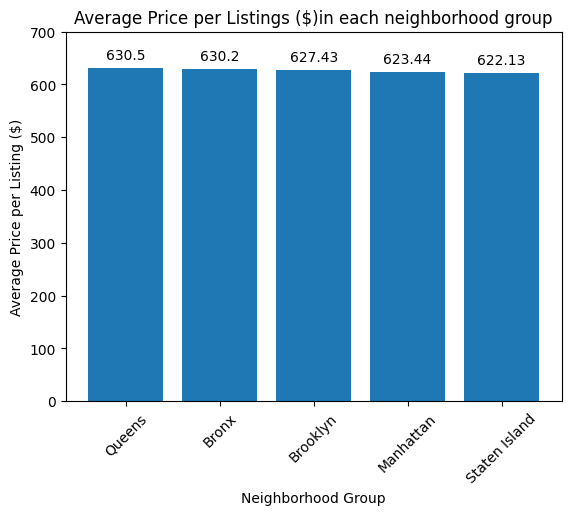

In [ ]:
#Which neighborhoods group have the highest average prices for Airbnb listings?
avg_price= df.groupby('neighbourhood group')['price'].mean().sort_values(ascending=False).to_frame()
avg_price_bar= plt.bar(avg_price.index, avg_price.loc[:,"price"]);
plt.bar_label(avg_price_bar, labels= round(avg_price.loc[:,"price"],2), label_type='edge', padding = 4);
plt.ylim([0,700]);
plt.xlabel('Neighborhood Group');
plt.ylabel('Average Price per Listing ($)');
plt.xticks(rotation=45);
plt.title('Average Price per Listings ($)in each neighborhood group');

Among the five identified neighborhood groups in the dataset, Queens boasts the highest average listing price at 630.5 USD, closely trailed by the Bronx with an average listing price of 630.2 USD. conversely, Staten Island records the lowest average listing price at 622.13 USD.

Is there a relationship between the construction year of property and price?

In [ ]:
#Is there a relationship between the construction year of property and price?

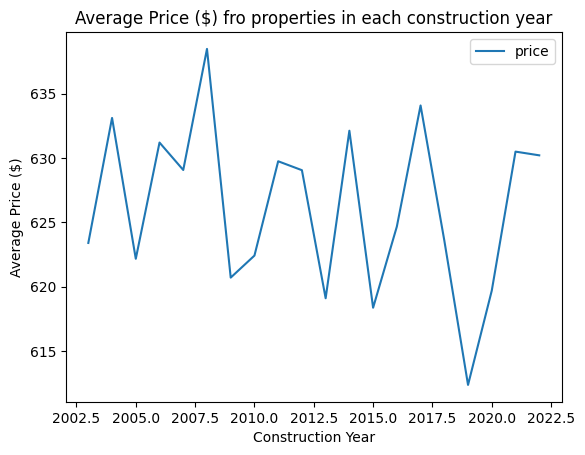

In [ ]:
df.groupby(df['Construction year'])['price'].mean().to_frame().plot();
plt.xlabel('Construction Year');
plt.ylabel('Average Price ($)');
plt.title('Average Price ($) fro properties in each construction year');

The line plot depicting the construction year of properties versus the average price per property reveals a noticable downward trend in prices as the construction years progress. The pattern demonstrates decreasing lows and highs, suggesting an overall decline in property prices as time progresses.

Who are the top 10 hosts by calculated host listing count?

From the numerous hosts in the dataset we will see the 10 hosts with the highest calculated hot count.

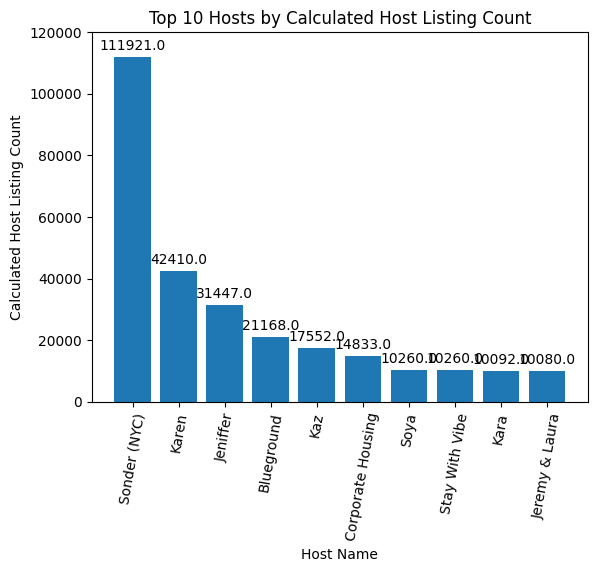

In [ ]:
#Who are the top 10 hosts by calculated host listing count?
hosts=df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending=False).nlargest(10).to_frame()
hosts_bar= plt.bar(hosts.index, hosts.loc[:,"calculated host listings count"]);
plt.bar_label(hosts_bar, labels= hosts.loc[:,"calculated host listings count"], label_type='edge',padding=3);
plt.xlabel('Host Name');
plt.ylabel('Calculated Host Listing Count');
plt.xticks(rotation=80);
plt.ylim([0,120000]);
plt.title('Top 10 Hosts by Calculated Host Listing Count');

The bar chart above illustrates the top 10 hosts based on the calculated listing count, with Sonder (NYC) notably leading with 111,921 listings.
Subsequently, the other hosts follow in descending order.

*  Karen at 2nd position with 42410 hosts.
*  Jenifier at 3rd with 31447 hosts.
*  Blueground at 4th with 21168 hosts.
*  Kaz at 5th with 17552 hosts.
*  Corporate housing at 6th with 14833 hosts.
*  Soya at 7th with 10260 hosts.
*  Stay with vibe at 8th with 10260 hosts.
*  Kara at 9th with 10092 hosts.
*  Jeremy and Laura at 10th with 10080 hosts.









Are hosts with verified identities more likely to receive positive reviews?

In [ ]:
#Are hosts with verified identities more likely to receive positive reviews?
review =df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending=False).to_frame()
review

,review rate number
host_identity_verified,
verified,3.284066
unconfirmed,3.273325


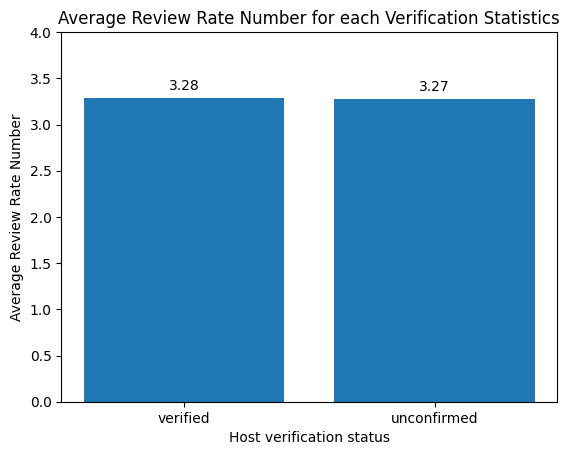

In [ ]:
review_bar = plt.bar(review.index, review.loc[:,"review rate number"]);
plt.bar_label(review_bar, labels= round(review.loc[:,"review rate number"],2), padding = 4);
plt.ylim([0,4]);
plt.xlabel('Host verification status');
plt.ylabel('Average Review Rate Number');
plt.title('Average Review Rate Number for each Verification Statistics');

The Average review rates for verified and unconfirmed hosts are 3.28 and 3027, respectively, indicating a marginal difference in their review rates with unconfirmed hosts having a slightly higher rate. This suggests that verified hosts are not necessarily more likely to receive positive reviews compared to unconfirmed hosts.

Is there a correlation between the price of a listing and its service fee?

In [ ]:
#Is there a correlation between the price of a listing and its service fee?
df['price'].corr(df['service fee'])

np.float64(0.9999909082976466)

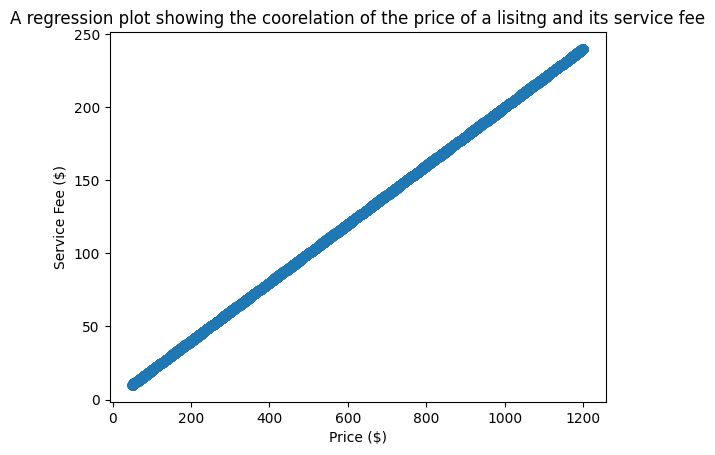

In [ ]:
sns.regplot(df,x='price',y='service fee');
plt.xlabel('Price ($)');
plt.ylabel('Service Fee ($)');
plt.title('A regression plot showing the coorelation of the price of a lisitng and its service fee');

The Pearson coorelation coefficient between the price and service fee is 0.99, indicating a highly robust positive coorelation between these varaibles. On the regression plot, each point forms a rising diagonal line towards the right, signifying that as the price of a property increases, so does its service fee.

What is the Average review rate numver for lisitnfs and does it vary based on the neighborhood group and room type?

In [ ]:
#What is the Average review rate numver for lisitnfs and does it vary based on the neighborhood group and room type?
ARRN = df.groupby(['neighbourhood group','room type'])['review rate number'].mean().to_frame()
ARRN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.381881
                    Private room               3.305810
                    Shared room                3.356322
Brooklyn            Entire home/apt            3.242491
                    Hotel room                 3.833333
                    Private room               3.274773
                    Shared room                3.323383
Manhattan           Entire home/apt            3.268846
                    Hotel room                 3.500000
                    Private room               3.285431
                    Shared room                3.261976
Queens              Entire home/apt            3.349528
                    Hotel room                 3.750000
                    Private room               3.310847
                    Shared room                3.327402
Staten Island       Entire home/apt            3.333333
                    Private room               3.497449
                    Shared room                3.714286

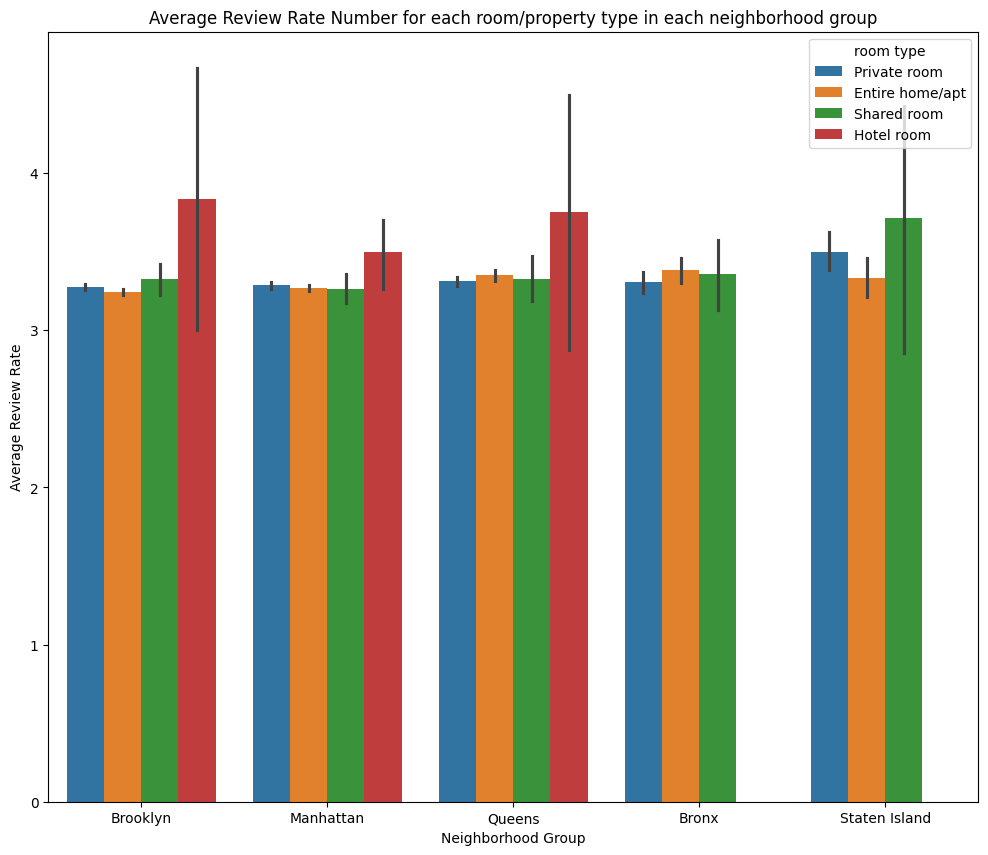

In [ ]:
plt.figure(figsize= [12,10]);
sns.barplot(data=df, x='neighbourhood group', y='review rate number', hue='room type');
plt.xlabel('Neighborhood Group');
plt.ylabel('Average Review Rate');
plt.title('Average Review Rate Number for each room/property type in each neighborhood group');

Hotel rooms exhibit has higher review rate compared to all other property types within the three neighborhood groups where they are located: Brooklyn, Manhattan and Queens.

Are hosts with a higher calculated host listings count more likely to maintain higher availability througyhout the year?

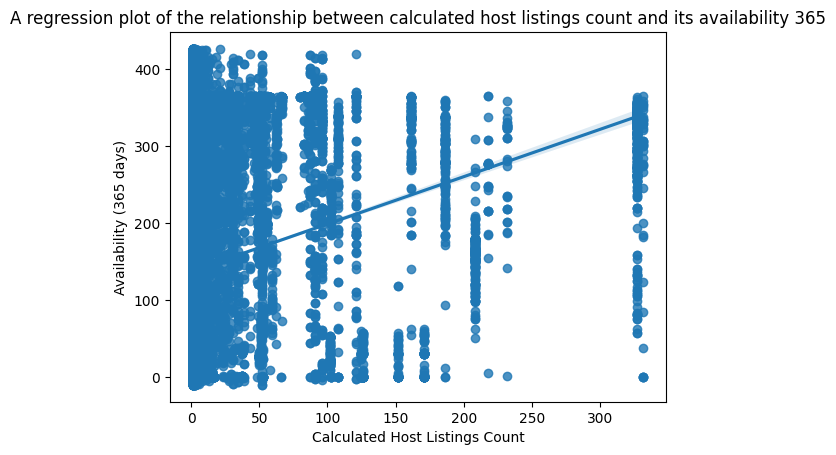

In [ ]:
#Are hosts with a higher calculated host listings count more likely to maintain higher availability througyhout the year?
sns.regplot(df,x='calculated host listings count',y='availability 365');
plt.xlabel('Calculated Host Listings Count');
plt.ylabel('Availability (365 days)');
plt.title('A regression plot of the relationship between calculated host listings count and its availability 365');

In [ ]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(0.1359971471570339)

The Pearson correlation coefficient for the association between calculated host listings and availability 365 is 0.136, indicating a weal positive correlation between the two varaiables.

Conclusion

In conclusion, this project has provided a comprehensive analysis of the New York City Airbnb dataset shedding light on various aspects of the short- term lodging market. Through data wrangling, exploratory data analysis(EDA) and intrepretation of summary statistics, we've uncovered valauable insights into listing distribution, price dynamics, host and review analysis.

Key findings include the dominance in counts of Entire home lisitings, the variability in lisitimgs counts across nieghborhood groups, and the downward trend between property construction year and price, Additionally, the analysis highlighted the significance of verified host status on review rates as well as the strong correlatiion between listings price and service fee.

Furthermore, conducting sentiment anaysis is on guest reviews to understand factors driving customer statisfaction and preferences could inform trageted marketing strategies and product improvements for Airbnb. Lastly, expanding, the analysis to include predictive modeling technique, such as regression or machine learning algorithms could enable forecasting of listing demand, trends and customer behavious, facilitating strategic decision making for stake holders in the shor5t term lodging industry.